<a href="https://colab.research.google.com/github/Vijayarajan-S/Fish-Classification-using-CNN/blob/main/FishclasificationVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

# Use gdown with the folder link
!gdown --folder https://drive.google.com/drive/folders/1iKdOs4slf3XvNWkeSfsszhPRggfJ2qEd -O /content/Dataset


Retrieving folder contents
Processing file 1GHqB7F1AYocMbiUcqOa4VFtw5mJH0wmb Dataset.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1GHqB7F1AYocMbiUcqOa4VFtw5mJH0wmb
From (redirected): https://drive.google.com/uc?id=1GHqB7F1AYocMbiUcqOa4VFtw5mJH0wmb&confirm=t&uuid=4974e8a1-2bb1-4e6d-9c38-57b351a98e75
To: /content/Dataset/Dataset.zip
100% 271M/271M [00:02<00:00, 135MB/s]
Download completed


In [ ]:
!unzip '/content/Dataset/Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KF3D8XIXVZOD.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KWS8S1W9I9PG.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LRPEM4RGWRY7.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/ZHYP7L0380A5.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LA6K9A1Z300T.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/DSTJ0FNZ17NI.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/8HEN19LAPJGS.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/7UQQICO4NVWK.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/OKKCEF9K4K64.jpg  
  in

In [ ]:
import tensorflow as tf

# Set paths
train_dir = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_dir = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/val"
test_dir = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # resize all images to 224x224
    batch_size=16,
    shuffle=True
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=16,
    shuffle=False
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=16,
    shuffle=False
)


Found 6225 files belonging to 11 classes.
Found 1092 files belonging to 11 classes.
Found 3187 files belonging to 11 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

num_classes = 11  # you have 11 categories

# 1. Load VGG16 with pre-trained ImageNet weights
base_model = VGG16(
    include_top=False,          # do NOT include final classification layer
    weights="imagenet",         # use pre-trained weights
    input_shape=(224, 224, 3)   # your image size
)

# 2. Freeze the base model to retain pre-trained weights
base_model.trainable = False

# 3. Build your custom model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 11-class classification
])

# 4. Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',  # because labels are integers
    metrics=['accuracy']
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,567,947 (105.16 MB)

 Trainable params: 12,852,235 (49.03 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
import datetime
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

# Log directory for TensorBoard
log_dir = "logs/vgg16/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Save best model during training
checkpoint_callback = ModelCheckpoint(
    "best_vgg16_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

# Train model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[tensorboard_callback, checkpoint_callback]
)


Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7399 - loss: 0.9145
Epoch 1: val_accuracy improved from -inf to 0.98352, saving model to best_vgg16_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 73s 155ms/step - accuracy: 0.7402 - loss: 0.9132 - val_accuracy: 0.9835 - val_loss: 0.0547
Epoch 2/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9903 - loss: 0.0411
Epoch 2: val_accuracy improved from 0.98352 to 0.98443, saving model to best_vgg16_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 69s 149ms/step - accuracy: 0.9903 - loss: 0.0411 - val_accuracy: 0.9844 - val_loss: 0.0512
Epoch 3/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9970 - loss: 0.0200
Epoch 3: val_accuracy improved from 0.98443 to 0.98901, saving model to best_vgg16_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 78s 138ms/step - accuracy: 0.9970 - loss: 0.0200 - val_accuracy: 0.9890 - val_loss: 0.0490
Epoch 4/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9967 - loss: 0.0139
Epoch 

In [ ]:
import numpy as np

# Predict probabilities for each class
pred_probs = model.predict(val_dataset)  # shape: (num_samples, num_classes)

# Get predicted class index for each image
pred_classes = np.argmax(pred_probs, axis=1)

# Get true labels (for comparison)
true_labels = np.concatenate([y for x, y in val_dataset], axis=0)

# Get class names
class_names = train_dataset.class_names
pred_names = [class_names[i] for i in pred_classes]
true_names = [class_names[i] for i in true_labels]


69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step


In [ ]:
for i in range(10):
    print(f"Image {i+1}: Predicted = {pred_names[i]}, True = {true_names[i]}")# it shows first few predition


Image 1: Predicted = animal fish, True = animal fish
Image 2: Predicted = animal fish, True = animal fish
Image 3: Predicted = animal fish, True = animal fish
Image 4: Predicted = animal fish, True = animal fish
Image 5: Predicted = animal fish, True = animal fish
Image 6: Predicted = animal fish, True = animal fish
Image 7: Predicted = animal fish, True = animal fish
Image 8: Predicted = animal fish, True = animal fish
Image 9: Predicted = animal fish, True = animal fish
Image 10: Predicted = animal fish, True = animal fish


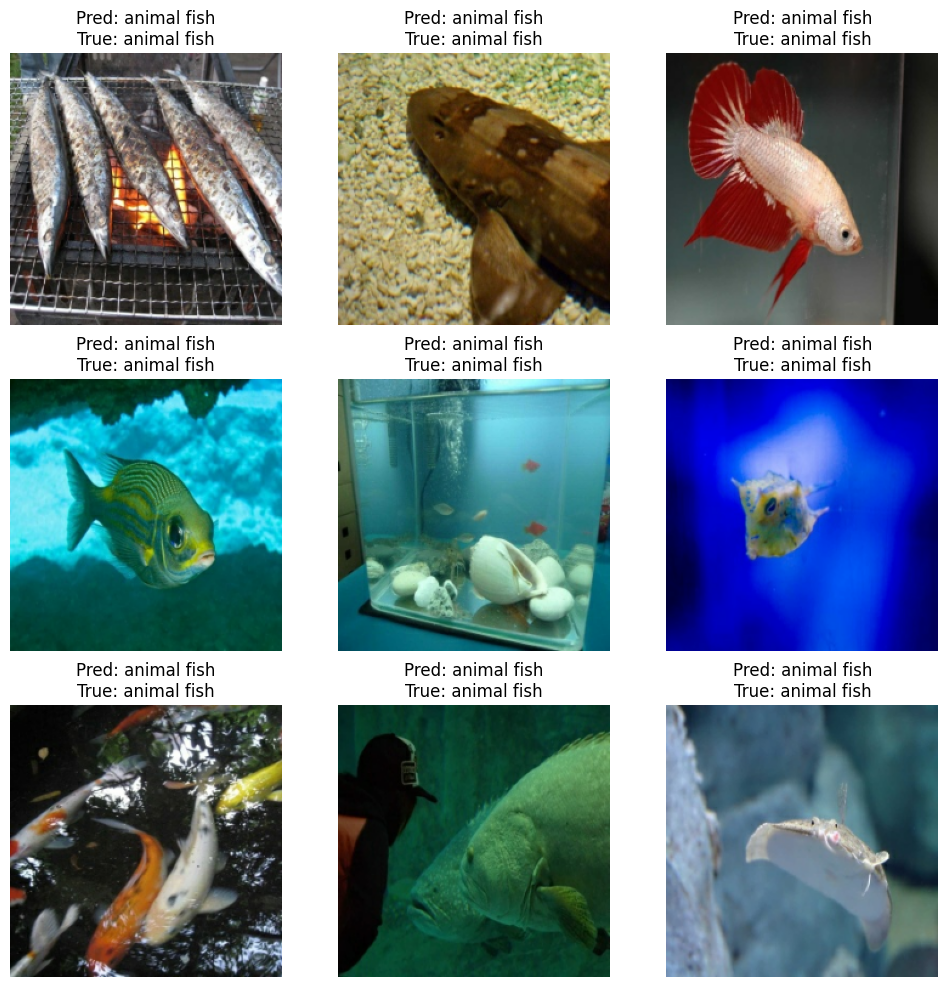

In [ ]:
import matplotlib.pyplot as plt

x_val = np.concatenate([x for x, y in val_dataset], axis=0)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i].astype("uint8"))
    plt.title(f"Pred: {pred_names[i]}\nTrue: {true_names[i]}")
    plt.axis("off")
plt.show()


In [ ]:
class_names = train_dataset.class_names
print(class_names)


['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food black_sea_sprat/00JL3HEP2KW2.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize if your training data was normalized

# Predict
pred_prob = model.predict(img_array)
pred_class = np.argmax(pred_prob, axis=1)
print("Predicted Class:", class_names[pred_class[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
Predicted Class: animal fish


above model is over fit

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load VGG16 without the top (fully connected) layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Initially freeze all layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.025))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3),  # higher LR for top layers
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Unfreeze the last 4 convolutional layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile with a lower learning rate (important!)
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint("best_vgg16_model.keras", monitor="val_loss",
                             save_best_only=True, verbose=1)

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5441 - loss: 1.4586
Epoch 1: val_loss improved from inf to 0.19005, saving model to best_vgg16_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 67s 156ms/step - accuracy: 0.5446 - loss: 1.4569 - val_accuracy: 0.9542 - val_loss: 0.1900
Epoch 2/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9808 - loss: 0.1249
Epoch 2: val_loss improved from 0.19005 to 0.09955, saving model to best_vgg16_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step - accuracy: 0.9808 - loss: 0.1248 - val_accuracy: 0.9771 - val_loss: 0.0995
Epoch 3/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9978 - loss: 0.0430
Epoch 3: val_loss improved from 0.09955 to 0.07814, saving model to best_vgg16_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 79s 139ms/step - accuracy: 0.9978 - loss: 0.0430 - val_accuracy: 0.9799 - val_loss: 0.0781
Epoch 4/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9986 - loss: 0.0229
Epoch 4: val_loss i

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food black_sea_sprat/00JL3HEP2KW2.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize if your training data was normalized

# Predict
pred_prob1 = model.predict(img_array)
pred_class = np.argmax(pred_prob1, axis=1)
print("Predicted Class:", class_names[pred_class[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: animal fish


In [ ]:
pred_probs =model.predict(test_dataset)
pred_probs

200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step


array([[9.9999392e-01, 5.5179967e-06, 8.2079046e-09, ..., 7.0027655e-09,
        7.8136395e-09, 1.0145350e-08],
       [9.9998224e-01, 2.5690667e-06, 2.3417419e-06, ..., 1.9947133e-06,
        1.5039171e-07, 2.8018016e-07],
       [9.9999726e-01, 2.5263869e-06, 1.1805002e-08, ..., 3.3089560e-09,
        5.0294520e-09, 7.3947541e-09],
       ...,
       [1.0158828e-07, 4.2437846e-06, 4.9520867e-07, ..., 1.2232027e-07,
        1.6073600e-06, 9.9996102e-01],
       [3.7380498e-05, 3.5666185e-04, 5.1835854e-05, ..., 3.2848709e-06,
        8.8760726e-06, 9.9924713e-01],
       [5.0569422e-08, 5.5680875e-06, 1.2201889e-07, ..., 2.3010609e-08,
        1.7060216e-07, 9.9998891e-01]], dtype=float32)

In [ ]:
import numpy as np

pred_classes = np.argmax(pred_probs, axis=1)
print(pred_classes)
# e.g., [1, 1, 0, 2, 0]


[ 0  0  0 ... 10 10 10]


In [ ]:
class_names = test_dataset.class_names  # if test_dataset has class_names
pred_names = [class_names[i] for i in pred_classes]
print(pred_names)
# e.g., ['cat', 'cat', 'dog', 'bird', 'dog']


['animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal fish', 'animal f

In [ ]:
pred_probs.shape
# (num_samples, num_classes)


(3187, 11)

In [ ]:
img_path = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food striped_red_mullet/0F94C67N6HFA.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize if your training data was normalized

# Predict
pred_prob1 = model.predict(img_array)
pred_class = np.argmax(pred_prob1, axis=1)
print("Predicted Class:", class_names[pred_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: animal fish


In [ ]:
import numpy as np
y_train = np.concatenate([y for x, y in train_dataset], axis=0)
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(train_dataset.class_names, counts)))


{'animal fish': np.int64(1096), 'animal fish bass': np.int64(30), 'fish sea_food black_sea_sprat': np.int64(569), 'fish sea_food gilt_head_bream': np.int64(566), 'fish sea_food hourse_mackerel': np.int64(573), 'fish sea_food red_mullet': np.int64(579), 'fish sea_food red_sea_bream': np.int64(571), 'fish sea_food sea_bass': np.int64(538), 'fish sea_food shrimp': np.int64(576), 'fish sea_food striped_red_mullet': np.int64(547), 'fish sea_food trout': np.int64(580)}


In [ ]:
# Unfreeze the last 4 convolutional layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile with a lower learning rate (important!)
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

# Apply only to train_dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
max_weight = 5  # reduce extreme influence
class_weight_dict = {k: min(v, max_weight) for k, v in class_weight_dict.items()}


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get all training labels
y_train = np.concatenate([y for x, y in train_dataset], axis=0)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

checkpoint = ModelCheckpoint("best_vgg16_cw_model.keras", monitor="val_loss",
                             save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor="val_loss", patience=5, verbose=1)

class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

# Train model with class weights
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[checkpoint, early_stop]
)


Class Weights: {0: np.float64(0.5163404114134041), 1: np.float64(18.863636363636363), 2: np.float64(0.9945678223358364), 3: np.float64(0.9998393832316094), 4: np.float64(0.9876249405045217), 5: np.float64(0.9773904851625059), 6: np.float64(0.9910842222576023), 7: np.float64(1.0518756336600203), 8: np.float64(0.9824810606060606), 9: np.float64(1.0345687219544624), 10: np.float64(0.975705329153605)}
Epoch 1/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9613 - loss: 0.2290
Epoch 1: val_loss improved from inf to 0.06085, saving model to best_vgg16_cw_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 114s 292ms/step - accuracy: 0.9614 - loss: 0.2285 - val_accuracy: 0.9835 - val_loss: 0.0608
Epoch 2/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9690 - loss: 0.0963
Epoch 2: val_loss did not improve from 0.06085
390/390 ━━━━━━━━━━━━━━━━━━━━ 113s 289ms/step - accuracy: 0.9690 - loss: 0.0962 - val_accuracy: 0.9808 - val_loss: 0.0656
Epoch 3/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [ ]:
img_path = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food shrimp/0ZR9Y0GSYRQ7.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize if your training data was normalized

# Predict
pred_prob1 = model.predict(img_array)
pred_class = np.argmax(pred_prob1, axis=1)
print("Predicted Class:", class_names[pred_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: animal fish bass


In [ ]:
img_path = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food red_sea_bream/021MQQOFDLIZ.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize if your training data was normalized

# Predict
pred_prob1 = model.predict(img_array)
pred_class = np.argmax(pred_prob1, axis=1)
print("Predicted Class:", class_names[pred_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Class: animal fish bass
